#### Exploration of the number of substances in the REACH Study summaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import openpyxl
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage

#Show mols in dataframes
from rdkit.Chem import PandasTools
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from IPython.core.display import HTML
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
import os
import sys
from scipy.spatial.distance import pdist, squareform

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
processed_dir = TOP +'data/processed/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [3]:
df = pd.read_excel(raw_dir+'reach_study_results-dossier_info_09-08-2022.xlsx',sheet_name = 'REACH Study Results 09-08-2022')

In [5]:
df.head()

,DOSSIER UUID (Dossier),NAME (Substance),CAS_NUMBER (Ref. sub.),NUMBER_IN_INVENTORY (Ref. sub.),IUPAC_NAME (Ref. sub.),Modified (See Notes),New (See notes)
0,a540d264-c042-46a9-b7dd-e26006a257ee,"( 4-hydroxystyrene, 4-t butoxy styrene and 2,5...",NaN,433-610-4,NaN,NaN,NaN
1,a87a398c-5ac9-473a-a773-75ab5cfea1c0,"((2-ethyl-1-oxohexyl)oxy)-(1-phenyl-1,3-decane...",NaN,422-920-5,NaN,NaN,NaN
2,410ddaaf-55ff-48f3-a5d4-4fd5904090fd,((4-phenylbutyl)hydroxyphosphoryl)acetic acid ...,83623-61-4,NaN,2-[hydroxy(4-phenylbutyl)phosphoryl]acetic acid,NaN,NaN
3,d95ea956-7599-47c1-9352-ba9bb31ba7fe,"((4S,4aR,7S,7aR)-4,7-dimethylhexahydrocyclopen...",NaN,953-513-5,"((4S,4aR,7S,7aR)-4,7-dimethylhexahydrocyclopen...",NaN,yes
4,d3de0b48-18bd-4608-a909-5de9205c881d,((6-chloro-4-((2-methoxy-3-(1-methyl-1H-1.2.4-...,NaN,950-319-2,((6-chloro-4-((2-methoxy-3-(1-methyl-1H-1.2.4-...,NaN,NaN


In [8]:
df.groupby('NAME (Substance)').nunique()

,DOSSIER UUID (Dossier),CAS_NUMBER (Ref. sub.),NUMBER_IN_INVENTORY (Ref. sub.),IUPAC_NAME (Ref. sub.),Modified (See Notes),New (See notes)
NAME (Substance),,,,,,
"''amyl nitrite'', mixed isomers",2,1,1,1,0,0
"( 4-hydroxystyrene, 4-t butoxy styrene and 2,5-dimethyl -2.5-diacryloxyhexane) copolymer",1,0,1,0,0,0
"((2-ethyl-1-oxohexyl)oxy)-(1-phenyl-1,3-decanedionyl)dioctyl stannane; bis(1-phenyl-1,3-decanedionyl)dioctyl stannane; bis[((2-ethyl-1-oxohexyl)oxy)dioctylstannyl]oxide; reaction mass of: bis[(2-ethyl-1-oxohexyl)oxy]dioctyl stannane",1,0,1,0,0,0
((4-phenylbutyl)hydroxyphosphoryl)acetic acid [SQ 26999],1,1,0,1,0,0
"((4S,4aR,7S,7aR)-4,7-dimethylhexahydrocyclopenta[c]pyran-1(3H)-one",1,0,1,1,0,1
...,...,...,...,...,...,...
δ-valerolactone,2,1,1,1,1,0
"ε-Caprolactone, oligomeric reaction products with 2,2'-oxydiethanol",1,1,1,1,0,0
"ε-Caprolactone, oligomeric reaction products with propylidynetrimethanol",1,1,1,1,0,0


In [9]:
df.groupby('CAS_NUMBER (Ref. sub.)').nunique()

,DOSSIER UUID (Dossier),NAME (Substance),NUMBER_IN_INVENTORY (Ref. sub.),IUPAC_NAME (Ref. sub.),Modified (See Notes),New (See notes)
CAS_NUMBER (Ref. sub.),,,,,,
1165939-52-5,1,1,1,1,0,0
00-00-0,1,1,1,1,0,0
100-00-5,3,1,1,1,0,0
100-01-6,3,1,1,1,0,0
100-02-7,1,1,1,1,0,0
...,...,...,...,...,...,...
not applicable,2,2,2,2,1,0
not available,6,6,6,6,1,0
not given,1,1,1,1,0,0


#### Exploring the ARN summaries mapped to DTXSID content

In [25]:
df1 = pd.read_excel(raw_dir+'PublishedARNs_structures.xlsx')

In [26]:
df1.columns

Index(['Group name', 'Substance name', 'Description', 'EC / List no', 'CAS no',
       'Concern', 'Status', 'Follow-up', 'Foreseen regulatory need',
       'Date of intention', 'Date of assessment', 'Summary document',
       'Full document', 'Remarks', 'Authority', 'Submitter organisation',
       'Submitter email', 'Submitter phone', 'Submitter address',
       'Co-submitter(s)', 'Latest update', 'First published', 'Molecule',
       'DSSTox_Compound_id', 'DSSTox_Substance_id', 'CASRN', 'QC_Level',
       'Preferred_name', 'Mol_Formula', 'Dashboard_URL'],
      dtype='object')

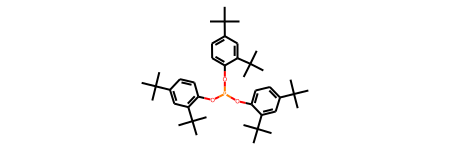

In [27]:
Chem.MolFromMolBlock(df1['Molecule'][0])

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Group name                2184 non-null   object 
 1   Substance name            2184 non-null   object 
 2   Description               106 non-null    object 
 3   EC / List no              2184 non-null   object 
 4   CAS no                    2184 non-null   object 
 5   Concern                   0 non-null      float64
 6   Status                    2173 non-null   object 
 7   Follow-up                 2184 non-null   object 
 8   Foreseen regulatory need  2118 non-null   object 
 9   Date of intention         2139 non-null   object 
 10  Date of assessment        2184 non-null   object 
 11  Summary document          2183 non-null   object 
 12  Full document             0 non-null      float64
 13  Remarks                   0 non-null      float64
 14  Authorit

In [139]:
df1[df1['DSSTox_Substance_id'].isnull()].to_csv(interim_dir+'unmapped_DSSTox.csv')

In [29]:
df2 = df1[df1['DSSTox_Substance_id'].notnull()]

In [30]:
df2.shape 

(1131, 30)

In [39]:
def mol_block(s):
    a = Chem.MolFromMolBlock(s)
    a = Chem.MolToSmiles(a)
    return a

In [41]:
mol_block(df2['Molecule'][0])

'CC(C)(C)c1ccc(OP(Oc2ccc(C(C)(C)C)cc2C(C)(C)C)Oc2ccc(C(C)(C)C)cc2C(C)(C)C)c(C(C)(C)C)c1'

In [44]:
mysmi = {}
for k,v in zip(df2['DSSTox_Substance_id'], df2['Molecule']):
    try:
        a= mol_block(v) 
    except Exception as error:
        print(error, k)
    else:
        mysmi[k] = a

RDKit WARNING: [19:12:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:12:00] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [19:12:00] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit WARNING: [19:12:00] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:12:00] WARNING: not removing hydrogen atom without neighbors
RDKit ERROR: [19:12:00] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit WARNING: [19:12:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:12:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:12:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:12:01] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [19:12:01] WARNING: not removing hydrogen atom without neighbors


Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False) DTXSID301335182
Python argument types in
    rdkit.Chem.rdmolfiles.MolToSmiles(NoneType)
did not match C++ signature:
    MolToSmiles(RDKit::ROMol mol, bool isomericSmiles=True, bool kekuleSmiles=False, int rootedAtAtom=-1, bool canonical=True, bool allBondsExplicit=False, bool allHsExplicit=False, bool doRandom=False) DTXSID301335182


In [48]:
df3 = pd.DataFrame(list(mysmi.items()), columns = ['dtxsid', 'smiles'])

In [50]:
df4 = pd.merge(df2, df3, left_on = 'DSSTox_Substance_id', right_on = 'dtxsid', how = 'left')

In [70]:
mydict = {}
for i, group in df4.groupby(['Group name']):
    a= group[['dtxsid', 'smiles']]
    a = a.set_index('dtxsid')
    mydict[i] = a

In [91]:
[Chem.MolFromSmiles(e) for e in mydict['(tetrahydro)furan primary alcohol derivatives and their oxidation products']['smiles']]

In [93]:
mydict2 = {}
for k,v in mydict.items():
    try:
        v = [Chem.MolFromSmiles(e) for e in v['smiles']] 
    except Exception as error:
        print(k, error)
    else:
        mydict2[k] = v

simple vanadium compounds No registered converter was able to produce a C++ rvalue of type std::__cxx11::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type float


RDKit WARNING: [20:50:46] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:50:46] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:50:46] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:50:46] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [20:50:46] WARNING: not removing hydrogen atom without neighbors


#### Creating Maximum Common Substructural patterns

In [95]:
from rdkit.Chem import rdFMCS

In [104]:
from rdkit.Chem.Draw import MolsToGridImage

In [107]:
def MCC(s):
    res = rdFMCS.FindMCS(s,ringMatchesRingOnly=True,completeRingsOnly=True)
    return res.smartsString

In [108]:
mcc_lst = {}
for k, v in mydict2.items():
    if len(v) >2:
        mcc_lst[k] = MCC(v)

In [130]:
len(list(mydict.keys()))

83

In [133]:
#mydict2

In [135]:
pd.DataFrame(list(mcc_lst.items()), columns = ['group', 'MCS_SMARTS']).to_csv(interim_dir+'initialMCS_ARN_mappedtoDSSTox.csv')

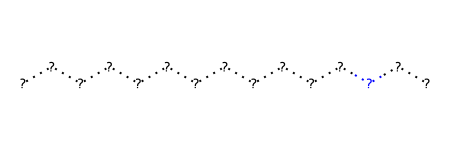

In [129]:
Chem.MolFromSmarts(mcc_lst[list(mydict2.keys())[8]])

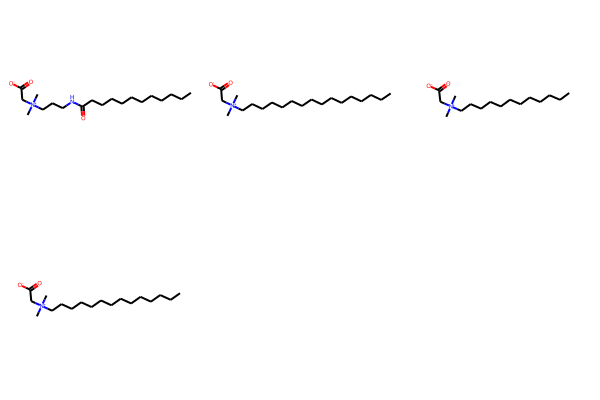

In [128]:
MolsToGridImage(mydict2[list(mydict2.keys())[8]])

#### Unmapped to DSSTox content

In [141]:
unmapped = df1[df1['DSSTox_Substance_id'].isnull()]

In [147]:
unmapped.head()

,Group name,Substance name,Description,EC / List no,CAS no,Concern,Status,Follow-up,Foreseen regulatory need,Date of intention,...,Latest update,First published,Molecule,DSSTox_Compound_id,DSSTox_Substance_id,CASRN,QC_Level,Preferred_name,Mol_Formula,Dashboard_URL
4,triphenylphosphite and its derivatives,Tris(nonylphenyl) phosphite,NaN,247-759-6,26523-78-4,NaN,Under development,Pending action,Restriction,30-ago-2021,...,05-lug-2022,05-lug-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,triphenylphosphite and its derivatives,Tris(methylphenyl) phosphite,NaN,247-119-6,25586-42-9,NaN,Under development,No action,Currently no EU RRM action needed,30-ago-2021,...,05-lug-2022,05-lug-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,triphenylphosphite and its derivatives,"tris (4-nonylphenol, branch) phosphorous acid ...",NaN,701-028-2,-,NaN,Under development,CCH,Restriction,30-ago-2021,...,25-nov-2022,05-lug-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,triphenylphosphite and its derivatives,Tri-o-tolyl phosphite,NaN,220-068-7,2622-08-4,NaN,Under development,No action,Currently no EU RRM action needed,30-ago-2021,...,05-lug-2022,05-lug-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,triphenylphosphite and its derivatives,Reaction products of triphenyl phosphite and i...,NaN,701-341-4,-,NaN,Under development,CCH,Currently no EU RRM action needed,30-ago-2021,...,05-lug-2022,05-lug-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
dsstox = pd.read_excel(raw_dir+'DSSToxQuery_20230207.xlsx')

In [207]:
unmapped

,Group name,Substance name,Description,EC / List no,CAS no,Concern,Status,Follow-up,Foreseen regulatory need,Date of intention,...,Latest update,First published,Molecule,DSSTox_Compound_id,DSSTox_Substance_id,CASRN,QC_Level,Preferred_name,Mol_Formula,Dashboard_URL
4,triphenylphosphite and its derivatives,Tris(nonylphenyl) phosphite,NaN,247-759-6,26523-78-4,NaN,Under development,Pending action,Restriction,30-ago-2021,...,05-lug-2022,05-lug-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,triphenylphosphite and its derivatives,Tris(methylphenyl) phosphite,NaN,247-119-6,25586-42-9,NaN,Under development,No action,Currently no EU RRM action needed,30-ago-2021,...,05-lug-2022,05-lug-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,triphenylphosphite and its derivatives,"tris (4-nonylphenol, branch) phosphorous acid ...",NaN,701-028-2,-,NaN,Under development,CCH,Restriction,30-ago-2021,...,25-nov-2022,05-lug-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,triphenylphosphite and its derivatives,Tri-o-tolyl phosphite,NaN,220-068-7,2622-08-4,NaN,Under development,No action,Currently no EU RRM action needed,30-ago-2021,...,05-lug-2022,05-lug-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,triphenylphosphite and its derivatives,Reaction products of triphenyl phosphite and i...,NaN,701-341-4,-,NaN,Under development,CCH,Currently no EU RRM action needed,30-ago-2021,...,05-lug-2022,05-lug-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,(tetrahydro)furan primary alcohol derivatives ...,"2S-(2-furyl)-5R-hydroxy-4R-(1R,2-dihydroxy)eth...",FURALGLUCITOLO,422-440-6,7089-59-0,NaN,Under development,No action,Currently no EU RRM action needed,28-mar-2022,...,19-set-2022,19-set-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2180,(tetrahydro)furan primary alcohol derivatives ...,2-[(tetrahydrofurfuryl)oxy]ethanol,NaN,227-407-8,5831-59-4,NaN,Under development,CLH,Harmonised Classification#Restriction,28-mar-2022,...,19-set-2022,19-set-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2181,(tetrahydro)furan primary alcohol derivatives ...,"2,5-anhydro-3,4-dideoxyhexitol",NaN,203-239-0,104-80-3,NaN,Under development,CLH,Harmonised Classification#Restriction,28-mar-2022,...,19-set-2022,19-set-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2182,(tetrahydro)furan primary alcohol derivatives ...,(S)-(-)-tetrahydro-2-furoic acid,NaN,433-770-5,-,NaN,Under development,CLH,Harmonised Classification#Restriction,28-mar-2022,...,19-set-2022,19-set-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
unmapped2 = pd.merge(unmapped, dsstox[dsstox['DSSTox_Substance_Id'].notnull()], left_on = 'CAS no', right_on = 'Query', how = 'left')

In [209]:
unmapped2 = unmapped2.drop_duplicates()

In [210]:
unmapped2[unmapped2['DSSTox_Substance_Id'].isnull()].to_csv(raw_dir+'toberegistered.csv')

In [214]:
unmapped2[unmapped2['DSSTox_Substance_Id'].isnull()].shape

(341, 46)

In [212]:
unmapped2.shape

(1053, 46)

In [161]:
df1.shape

(2184, 30)

In [178]:
final_df = pd.merge(df1, dsstox[dsstox['DSSTox_Substance_Id'].notnull()], left_on = 'CAS no', right_on = 'Substance_CASRN', how = 'left').drop_duplicates()

In [187]:
final_df[[ 'DSSTox_Substance_id','DSSTox_Substance_Id']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184 entries, 0 to 2234
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DSSTox_Substance_id  1130 non-null   object
 1   DSSTox_Substance_Id  710 non-null    object
dtypes: object(2)
memory usage: 51.2+ KB


In [188]:
final_df['dtxsid'] = final_df[[ 'DSSTox_Substance_id','DSSTox_Substance_Id']].apply(lambda x : x[0] if pd.notnull((x[0])) else x[1] , axis = 1)

In [190]:
final_df[['dtxsid']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184 entries, 0 to 2234
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dtxsid  1839 non-null   object
dtypes: object(1)
memory usage: 34.1+ KB


In [192]:
final_df.drop([ 'DSSTox_Substance_id','DSSTox_Substance_Id'], axis = 1, inplace = True)

In [196]:
final_df['QC_Level'] = final_df[[ 'QC_Level','DSSTox_QC-Level']].apply(lambda x : x[0] if pd.notnull((x[0])) else x[1] , axis = 1)

In [197]:
final_df.drop(['DSSTox_QC-Level'], axis = 1, inplace = True)

In [200]:
final_df[['DSSTox_Compound_id', 'CASRN', 'QC_Level', 'Preferred_name',
       'Mol_Formula', 'Dashboard_URL', 'Query', 'Found_By',
       'DSSTox_Structure_Id', 'Substance_Name', 'Substance_CASRN',
       'Substance_Type', 'Substance_Note', 'Structure_SMILES',
       'Structure_InChI', 'Structure_InChIKey', 'Structure_Formula',
       'Structure_MolWt', 'Structure_SMILES_2D-QSAR']]

,DSSTox_Compound_id,CASRN,QC_Level,Preferred_name,Mol_Formula,Dashboard_URL,Query,Found_By,DSSTox_Structure_Id,Substance_Name,Substance_CASRN,Substance_Type,Substance_Note,Structure_SMILES,Structure_InChI,Structure_InChIKey,Structure_Formula,Structure_MolWt,Structure_SMILES_2D-QSAR
0,DTXCID907969,31570-04-4,DSSTox_High,"Tris(2,4-di-tert-butylphenyl) phosphite",C42H63O3P,https://comptox.epa.gov/dashboard/DTXSID2027969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DTXCID306252,101-02-0,DSSTox_High,Triphenyl phosphite,C18H15O3P,https://comptox.epa.gov/dashboard/DTXSID0026252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DTXCID301767468,121627-17-6,DSSTox_High,"6,6���-[[3,3���-Bis(1,1-dimethylethyl)-5,5���-...",C46H44O8P2,https://comptox.epa.gov/dashboard/DTXSID60746295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DTXCID301477467,1803088-15-4,DSSTox_Low,"5,7-Di-tert-butyl-3-(3,5-dimethyl-4-[(1,3,9,11...",C54H73O5P,https://comptox.epa.gov/dashboard/DTXSID101019508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,DSSTox_High,NaN,NaN,NaN,26523-78-4,CAS-RN matched <b>null</b>,NaN,Nonylphenolphosphite(3:1),26523-78-4,Mixture of Stereoisomers,Ill-defined substance,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,NaN,NaN,DSSTox_High,NaN,NaN,NaN,7089-59-0,CAS-RN matched <b>null</b>,DTXCID101768646,"2,4-Monofurfurylidenesorbitol",7089-59-0,Mixture of Stereoisomers,NaN,[H][C@@]1(OC(O[C@@H](CO)[C@H]1O)C1=CC=CO1)[C@H...,InChI=1S/C11H16O7/c12-4-6(14)10-9(15)8(5-13)17...,YZNXOCVTNIERFC-NYONGVCJSA-N,C11H16O7,260.242,NaN
2231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2232,NaN,NaN,DSSTox_High,NaN,NaN,NaN,104-80-3,CAS-RN matched <b>null</b>,DTXCID60818168,"2,5-Tetrahydrofurandimethanol",104-80-3,Mixture of Stereoisomers,NaN,OCC1CCC(CO)O1,"InChI=1/C6H12O3/c7-3-5-1-2-6(4-8)9-5/h5-8H,1-4...",YCZZQSFWHFBKMU-UHFFFAOYNA-N,C6H12O3,132.159,OCC1CCC(CO)O1
2233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
final_df['Mol_Formula'] = final_df[['Mol_Formula','Structure_Formula']].apply(lambda x : x[0] if pd.notnull((x[0])) else x[1] , axis = 1)
final_df.drop(['Structure_Formula'], axis = 1, inplace = True)

In [202]:
final_df['DSSTox_Compound_id'] = final_df[['DSSTox_Compound_id','DSSTox_Structure_Id']].apply(lambda x : x[0] if pd.notnull((x[0])) else x[1] , axis = 1)
final_df.drop(['DSSTox_Structure_Id'], axis = 1, inplace = True)

In [203]:
final_df['CASRN'] = final_df[['CASRN','Substance_CASRN']].apply(lambda x : x[0] if pd.notnull((x[0])) else x[1] , axis = 1)
final_df.drop(['Substance_CASRN'], axis = 1, inplace = True)

In [204]:
final_df.drop(['Query', 'Found_By'], axis = 1, inplace = True)

In [206]:
final_df.drop('DateModified', axis = 1, inplace = True)

In [213]:
final_df.to_csv(raw_dir+'updated_mapping_060223.csv')